# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
plt.rcParams["mathtext.fontset"] = "cm"

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA
from NGD_TK_AS import NGD2L_TK_AS
from NGD_TK_AS import ParaTrans

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb
importing Jupyter notebook from NGD_TK_AS.ipynb


In [3]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

In [4]:
def cm2inch(value):
    return value/2.54

# Figsetup

shortcaption: The distribution of $\xi$ and that of $\Xi$. <br>
label: xi2Xi

In [5]:
filename = 'xi2Xi'

# Load Experimental data

## select files and channels

In [6]:
Fc_list = [2]
filenames = ['D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff='+str(Fc)+'_sort_unit2' for Fc in Fc_list]

dt = 0.01
cn = 53
x_list, T_list, rstate_list = expSnR(filenames, dt, 'LED', [cn])

In [7]:
#assign states
state_num = 6
xstate_list = [EqualState(x, state_num)[0] for x in x_list]

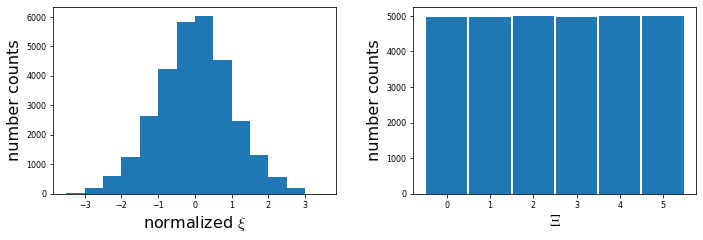

In [12]:
plt.rcParams["font.size"] = 8
fig, ax = plt.subplots(1,2)
ax[0].hist(x_list[0], bins= np.arange(-3,3+1+0.5,0.5)-0.5)
ax[1].hist(xstate_list[0], bins= np.arange(7)-0.5, rwidth= 0.95)

ax[0].set_xlabel(r'normalized $\xi$', fontsize = 16)
ax[1].set_xlabel(r'$\Xi$', fontsize = 16)
for a in ax:
    a.set_ylabel('number counts', fontsize = 16)
    
fig.tight_layout(pad = 0, w_pad = 0.0, h_pad=0.0)
fig.set_size_inches(10, 3)


In [13]:
fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\M\\'+filename+'.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)